# Star Wars Movies

In this project, we'll work with Jupyter notebook and analyze data on the Star Wars movies


While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

### reading Star Wars data:
We need to specify an encoding, because the dataset has some characters that aren't in Python's default utf-8 encoding.

In [36]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

Columns in the dataset:
* RespondentID — An anonymized ID for the respondent (person taking the survey)
* Gender — the respondent's gender
* Age — the respondent's age
* Household Income — the respondent's income
* Education — the respondent's education level
* Location (Census Region) — the respondent's location
* Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response
* Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response


In [37]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [38]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

Let's inspect the following columns:

* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?


In [39]:
sw_seen_6_movies = 'Have you seen any of the 6 films in the Star Wars franchise?'
sw_fan = 'Do you consider yourself to be a fan of the Star Wars film franchise?'

In [40]:
star_wars[sw_seen_6_movies].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [41]:
star_wars[sw_fan].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

These columns are strings and they represent yes and no answers. We will convert this data to boolean types because they are much easier to work with:

In [42]:
yes_no_map = {"Yes": True, "No": False}
star_wars[sw_seen_6_movies] =star_wars[sw_seen_6_movies].map(yes_no_map)
star_wars[sw_fan] =star_wars[sw_fan].map(yes_no_map)


In [43]:
star_wars[sw_seen_6_movies].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [44]:
star_wars[sw_fan].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Now, both columns should only contain the value True, False, or NaN.

In [45]:
star_wars['Unnamed: 4'].value_counts(dropna=False)

NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64

### Rename columns with easier names and convert values to Boolean
The colums from index 3 to 9 are questions about whether someona has seen a particular star wars movie.
The only possible answer is yes or no, so it should be as well a boolean value. The value NaN represents false.
We will do a function to convert the values from index 3 to 9 and at the same time rename its columns with a more easier value to manipulate.

In [46]:
import numpy as np
s = 'seen_'
i = 1
colname_map = {}
#works because first row has values diff than NaN:
for col in star_wars.iloc[:,3:9].columns:
    movie_name = star_wars.loc[0,col]
    cur_col_map = {movie_name: True,np.NaN: False}
    star_wars[col]= star_wars[col].map(cur_col_map)
    colname_map[col]= s+str(i)
    i+=1

star_wars.rename(columns=colname_map, inplace = True)

In [47]:
star_wars.iloc[:,3:9]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1181,True,True,True,True,True,True
1182,True,True,True,True,True,True
1183,False,False,False,False,False,False
1184,True,True,True,True,True,True


### Remame columns and convert to float:

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN.
Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.



In [48]:
star_wars.iloc[:,9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1181,5.0,4.0,6.0,3.0,2.0,1.0
1182,4.0,5.0,6.0,2.0,3.0,1.0
1183,NaN,NaN,NaN,NaN,NaN,NaN
1184,4.0,3.0,6.0,5.0,2.0,1.0


In [49]:
#convert to float:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [50]:
#rename cols to ranking_n:

s = 'ranking_'
i = 1
colname_map = {}
#works because first row has values diff than NaN:
for col in star_wars.iloc[:,9:15].columns:
    name = star_wars.loc[0,col]
    colname_map[col]= s+str(i)
    i+=1

star_wars.rename(columns=colname_map, inplace = True)

In [51]:
star_wars.iloc[:,9:15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ranking_1  835 non-null    float64
 1   ranking_2  836 non-null    float64
 2   ranking_3  835 non-null    float64
 3   ranking_4  836 non-null    float64
 4   ranking_5  836 non-null    float64
 5   ranking_6  836 non-null    float64
dtypes: float64(6)
memory usage: 55.7 KB


Now that we've cleaned up the ranking columns, we can find the highest-ranked movie quicker. To do this, take the mean of each ranking columns using the pandas.DataFrame.mean() method on DataFrames.

In [52]:
ranking_means = star_wars.iloc[:,9:15].mean()


In [53]:
print(ranking_means)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


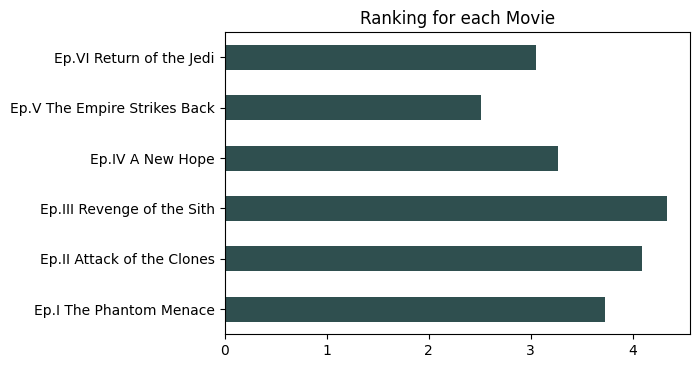

In [54]:
movie1 = 'Ep.I The Phantom Menace'
movie2 = 'Ep.II Attack of the Clones'
movie3 = 'Ep.III Revenge of the Sith'
movie4 = 'Ep.IV A New Hope'
movie5 = 'Ep.V The Empire Strikes Back'
movie6 = 'Ep.VI Return of the Jedi'
movies = [movie1,movie2,movie3,movie4,movie5,movie6]

%matplotlib inline
ranking_means.index = movies
ranking_means.plot(kind='barh', color='darkslategray',title='Ranking for each Movie')

The favorite movie is Ep. V The Empire Strikes Back, while the least favorite is the Ep III Revenge of the Sith.
Now, we will plot the seen episodes and check the ones that were seen most.
Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type. When we call methods like pandas.DataFrame.sum() or mean(), they treat Booleans like integers. They consider True a 1 and False a 0. That means we can plot as well the same way the seen sum for each movie:

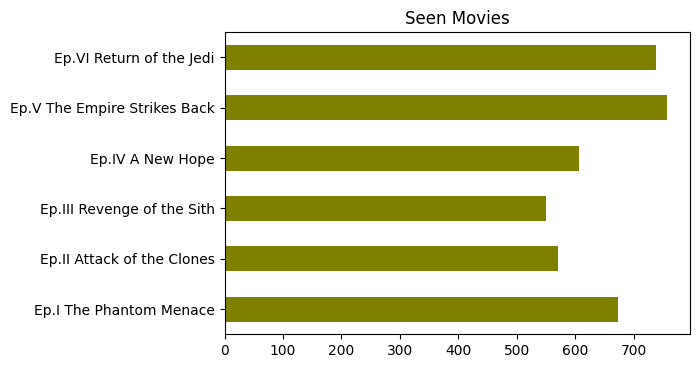

In [55]:
seen_sum = star_wars.iloc[:,3:9].sum()
%matplotlib inline
seen_sum.index = movies
seen_sum.plot(kind='barh', color='olive',title='Seen Movies')


From the seen movies, we can see that the one that was seen most is the also the favorite, and the less seen the least favorite.
Now we will calculate the correlation dataframe and check if the most favorite is correlated with the one that was most seen.

In [56]:
correlation = star_wars.corr()

In [57]:
for i in range(1,7):
    print(movies[i-1]+": "+str(correlation.loc['seen_'+str(i), 'ranking_'+str(i)]))

Ep.I The Phantom Menace: 0.06721819886300828
Ep.II Attack of the Clones: 0.041710629243309
Ep.III Revenge of the Sith: -0.18100065392203862
Ep.IV A New Hope: -0.5549321219736479
Ep.V The Empire Strikes Back: -0.4222257915671764
Ep.VI Return of the Jedi: -0.5096085572241511


The preference of the favorite movie has a correlation with the number of time it has been seen. It makes compltly sense, but the movie Return of Jedi ep VI is the one that its ranking is more correlated with the number of times it has been seen.
The correlations are negative because lower ranking is better

## Splitting the Dataframe into two groups:

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups.
The subsets allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

#### 1. Split the data into two groups based on one of the binary columns above.

### Favorite Movies Females vs Males:

In [58]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [59]:
ranking_means_male = males.iloc[:,9:15].mean()
ranking_means_female = females.iloc[:,9:15].mean()


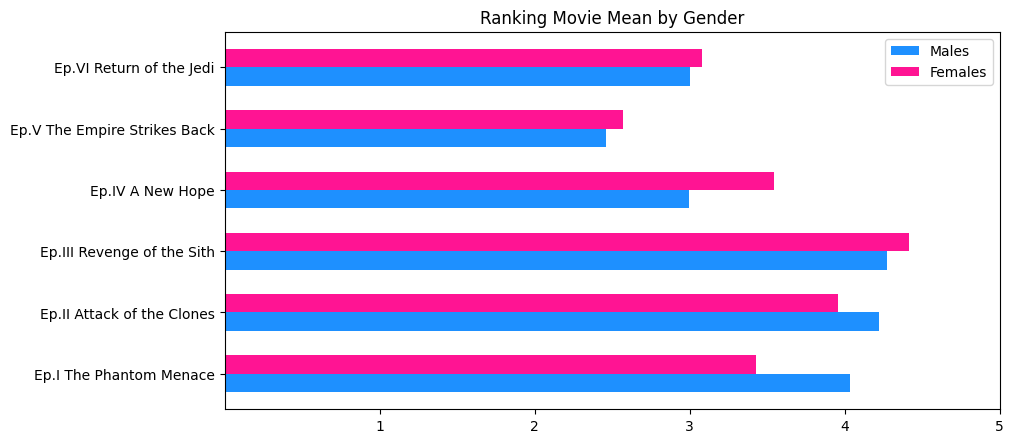

In [60]:
#Plotting Female and Male preferences:
%matplotlib inline
import matplotlib.pyplot as plt


N = 6
male_ranking_bar = (ranking_means_male)
female_ranking_bar = (ranking_means_female)

ind = np.arange(N)

plt.figure(figsize=(10,5))

width = 0.3       

plt.barh(ind, male_ranking_bar, width, color='dodgerblue', label='Males')
plt.barh(ind + width, female_ranking_bar, width, color='deeppink', label='Females')
plt.index = movies

plt.title('Ranking Movie Mean by Gender')
plt.yticks(ind + width / 2, movies)
plt.xticks(range(1,6))

plt.legend(loc='best')
plt.show()


pink and blue graphs are similar.
Women liked more ep II and I than men, and men liked more ep IV.
Both favorite movie is Ep V.
Let's now examine for the seen frequency.

### Seen Movies Females vs Males:

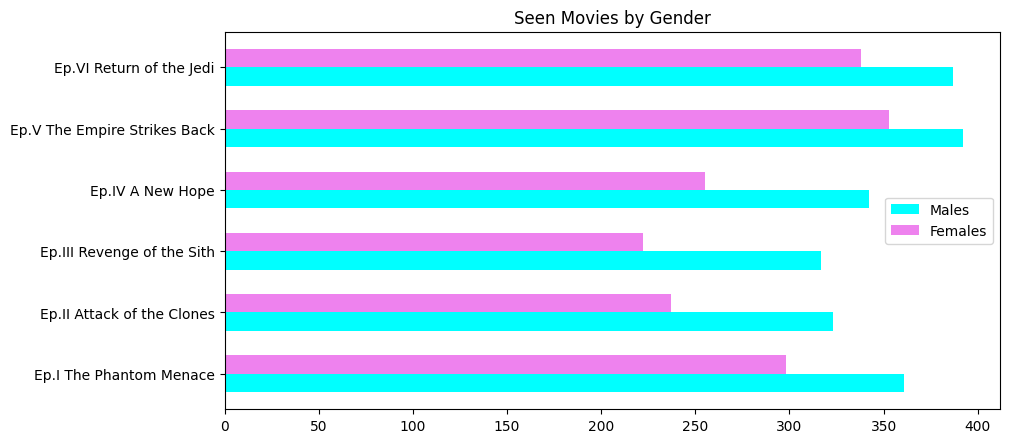

In [61]:
#Male seen movies:
seen_sum_male = males.iloc[:,3:9].sum()
#Female seen movies:
seen_sum_female = females.iloc[:,3:9].sum()



#Plotting Female and Male seen movies:
%matplotlib inline
import matplotlib.pyplot as plt
male_seen_bar = (seen_sum_male)
female_seen_bar = (seen_sum_female)

ind = np.arange(N)

plt.figure(figsize=(10,5))

width = 0.3       
plt.barh(ind, male_seen_bar, width, color='cyan', label='Males')
plt.barh(ind + width, female_seen_bar, width, color='violet', label='Females')
plt.index = movies

plt.title('Seen Movies by Gender')
plt.yticks(ind + width / 2, movies)


plt.legend(loc='best')
plt.show()

In [62]:
males.shape

(497, 38)

In [63]:
females.shape

(549, 38)

Even having a population of women higher, men defenitly see more Star Wars tha women.

### Star Wars Fans vs Not fans Seen Movies

In [64]:
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==True]
not_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==False]


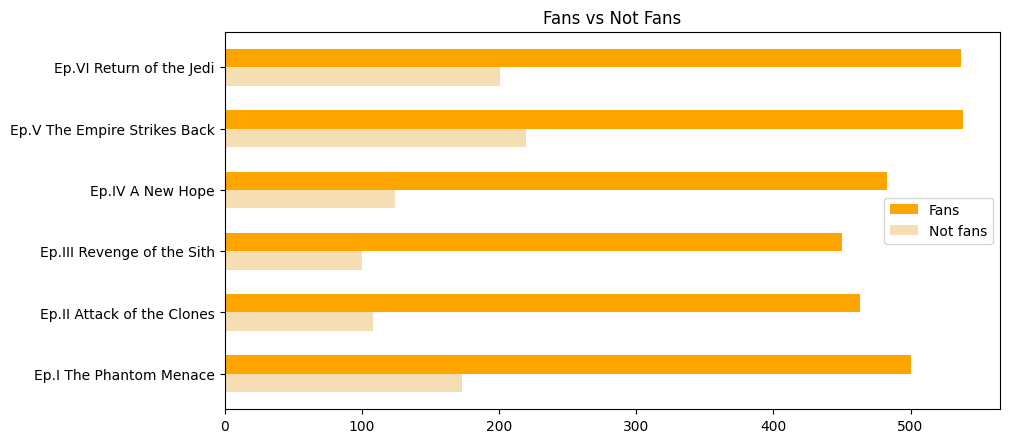

In [73]:
#Fans seen movies:
seen_sum_fans = fans.iloc[:,3:9].sum()
seen_sum_not_fans = not_fans.iloc[:,3:9].sum()

%matplotlib inline
import matplotlib.pyplot as plt
fan_bar = (seen_sum_fans)
not_fan_bar = (seen_sum_not_fans)

ind = np.arange(N)

plt.figure(figsize=(10,5))

width = 0.3       
plt.barh(ind+ width, fan_bar, width, color='orange', label='Fans')
plt.barh(ind, not_fan_bar, width, color='wheat', label='Not fans')
plt.index = movies

plt.title('Fans vs Not Fans')
plt.yticks(ind + width / 2, movies)
plt.legend(loc='center right')
plt.show()

As expected we can see that fans have seen more Star Wars movies than not fans. The most seen movie is the same in both fans and not fans: ep. v, and the least as well - ep. III.

### Star Wars Fans vs Not fans Favorite Movies

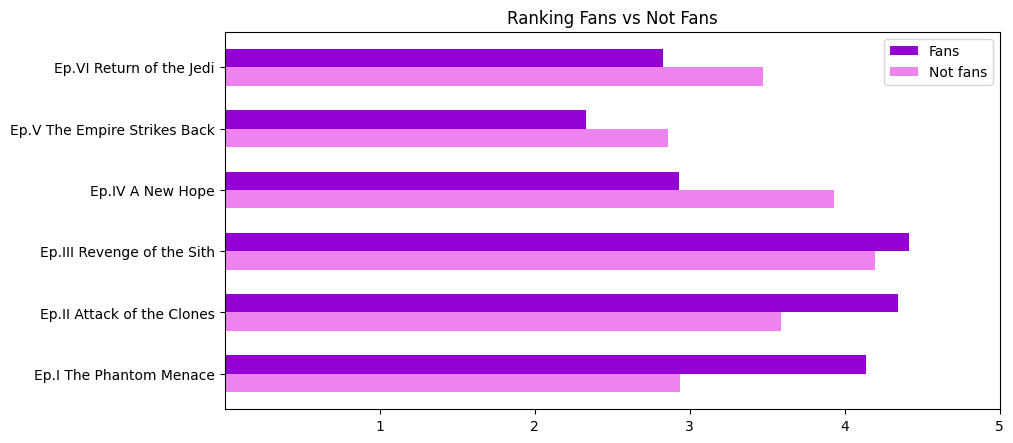

In [74]:
#Fans seen movies:
rank_movies_fans = fans.iloc[:,9:15].mean()
rank_movies_not_fans = not_fans.iloc[:,9:15].mean()

%matplotlib inline
import matplotlib.pyplot as plt
fan_bar = (rank_movies_fans)
not_fan_bar = (rank_movies_not_fans)

ind = np.arange(N)

plt.figure(figsize=(10,5))

width = 0.3       
plt.barh(ind+ width, fan_bar, width, color='darkviolet', label='Fans')
plt.barh(ind , not_fan_bar, width, color='violet', label='Not fans')
plt.index = movies

plt.title('Ranking Fans vs Not Fans')
plt.yticks(ind + width / 2, movies)
plt.xticks(range(1,6))
plt.legend(loc='best')
plt.show()

The favorite movie is episode V either you are a fan or not. Non Star Wars fans also enjoyed the same way episode 1, while fans prefer other movies suchh as ep VI, ep VI.
Also fans and non fans share the less favorite movie, which is Ep III.

(I am not a fan of Star Wars and my favorite movie is Ep. I, I can only speak for myself but the episode I is the funniest and I liked a lot Jar Jar Binks lol)

### Star Trek Fans and Star Wars Seen Movies

In [66]:
star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"].value_counts(dropna=False)

No     641
Yes    427
NaN    118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [77]:
# Star Trek fans and not fans:
fans_star_trek = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"]=='Yes']
not_fans_star_treks = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"]=='No']

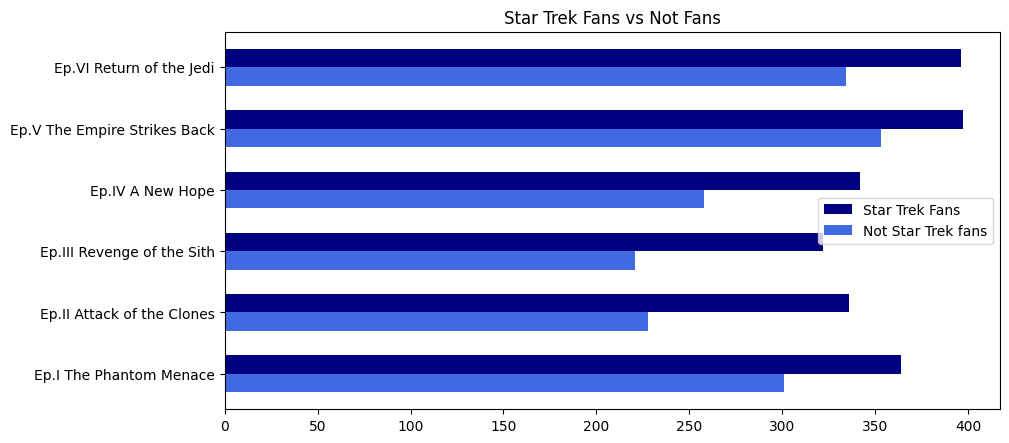

In [79]:
#Fans Star Trek seen movies:
seen_sum_strek_fans = fans_star_trek.iloc[:,3:9].sum()
seen_sum_not_strek_fans = not_fans_star_treks.iloc[:,3:9].sum()

%matplotlib inline
import matplotlib.pyplot as plt
st_fan_bar = (seen_sum_strek_fans)
not_st_fan_bar = (seen_sum_not_strek_fans)

ind = np.arange(N)

plt.figure(figsize=(10,5))

width = 0.3       
plt.barh(ind + width, st_fan_bar, width, color='navy', label='Star Trek Fans')
plt.barh(ind, not_st_fan_bar, width, color='royalblue', label='Not Star Trek fans')
plt.index = movies

plt.title('Star Trek Fans vs Not Fans')
plt.yticks(ind + width / 2, movies)
plt.legend(loc='center right')
plt.show()

Star Trek fans have seen more Stark Wars movies than non Star Trek Fans.
Fans have watched more EP V and EP VI, while non fans have watched more Ep V.
The least seen movie is Ep. III for both fans and non fans.

### Star Trek fans vs non fans Star Wars favorite movie

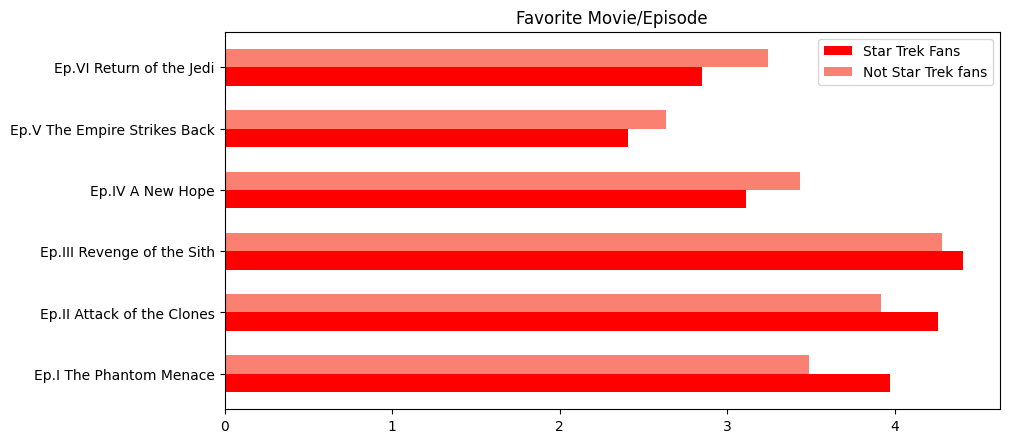

In [81]:
#Fans Star Trek seen movies:
mean_strek_fans = fans_star_trek.iloc[:,9:15].mean()
mean_strek_not_fans = not_fans_star_treks.iloc[:,9:15].mean()

%matplotlib inline
import matplotlib.pyplot as plt
st_fan_bar = (mean_strek_fans)
not_st_fan_bar = (mean_strek_not_fans)

ind = np.arange(N)

plt.figure(figsize=(10,5))

width = 0.3       
plt.barh(ind , st_fan_bar, width, color='red', label='Star Trek Fans')
plt.barh(ind + width, not_st_fan_bar, width, color='salmon', label='Not Star Trek fans')
plt.index = movies

plt.title('Favorite Movie/Episode')
plt.yticks(ind + width / 2, movies)
plt.legend(loc='best')
plt.show()

Both fans and non fans of Star Trek liked most episode V, and least episode III.

### Renaming columns from 15 to 29



In [86]:
star_wars.iloc[:, 15:29]
star_wars.iloc[:,16].value_counts()

Very favorably                                 552
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Unnamed: 16, dtype: int64

In [ ]:
char_map = {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
            'Unnamed: 16': 'Luke Skywalker',
            'Unnamed: 17': 'Princess Leia Organa',
            'Unnamed: 18': 'Anakin Skywalker',
            'Unnamed: 19': 'Obi Wan Kenobi',
            'Unnamed: 20': 'Emperor Palpatine',
            'Unnamed: 21': 'Darth Vader',
            'Unnamed: 22': 'Lando Calrissian',
            'Unnamed: 23': 'Boba Fett',
            'Unnamed: 24': 'C-3P0',
            'Unnamed: 25': 'R2 D2',
            'Unnamed: 26': 'Jar Jar Binks',
            'Unnamed: 27': 'Padme Amidala',
            'Unnamed: 28': 'Yoda'}